1. Veri Setini Yükleme ve İlk Gözlem
Bu kod bloğu, veri madenciliği sürecinin ilk ve en temel adımı olan veri setini belleğe yükleme ve ilk keşifsel incelemeleri yapma adımlarını içerir.

Amacı ve Önemi:
Veri Seti Yükleme: Pandas kütüphanesi kullanılarak belirtilen yoldaki .csv (Comma Separated Values - Virgülle Ayrılmış Değerler) uzantılı veri dosyası bir DataFrame'e okunur. try-except bloğu, dosyanın bulunamaması gibi olası hataları yakalayarak kullanıcıya bilgi verir ve programın beklenmedik şekilde durmasını engeller.

df.head(): Veri setinin ilk 5 satırını (varsayılan) görüntüleyerek, sütun isimlerini, veri türlerini ve genel yapısını hızlıca anlamamızı sağlar. Bu, veriye ilk bakışta aykırılıkları veya beklenmedik formatları fark etmemize yardımcı olur.

df.shape: Veri setinin boyutlarını, yani kaç satır (gözlem) ve kaç sütun (özellik) içerdiğini gösterir. Bu bilgi, veri setinin genel büyüklüğü hakkında fikir verir.

df.info(): Her bir sütunun adı, boş olmayan (non-null) değer sayısı ve veri tipi (int64, float64, object vb.) hakkında detaylı bilgi sağlar. Ayrıca veri setinin toplam bellek kullanımını da gösterir. Bu çıktı, eksik değerlerin ilk tespit edildiği ve sütunların doğru veri tipinde olup olmadığını kontrol ettiğimiz kritik bir adımdır.

df.describe(): Sadece sayısal sütunlar için temel istatistiksel özetler (ortalama, standart sapma, minimum, maksimum, çeyreklikler) sunar. Bu özetler, sayısal verilerin dağılımı hakkında hızlı bir genel bakış sağlar ve potansiyel aykırı değerlerin veya ilginç dağılımların ilk sinyallerini verebilir.

Bu adımlar, veri setini tanıma, potansiyel sorunları (eksik değerler, yanlış veri tipleri) erkenden fark etme ve sonraki veri temizleme ve hazırlık adımları için yol haritası oluşturma açısından hayati öneme sahiptir.

In [29]:
import pandas as pd

# Veri setinizin yolu
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"

# Adım 1: Veri setini yükle
try:
    df = pd.read_csv(file_path)
    print("Veri seti başarıyla yüklendi.\n")
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    print("Lütfen dosya yolunu kontrol edin ve tekrar deneyin.")
    exit() # Dosya bulunamazsa programı sonlandır

# 1. Veri Setinin İlk Birkaç Satırını Görüntüleme
print("--- Veri Setinin İlk 5 Satırı (df.head()) ---\n")
print(df.head())
print("\n" + "="*50 + "\n")

# 2. Veri Setinin Boyutlarını (Satır ve Sütun Sayısı) Öğrenme
print("--- Veri Setinin Boyutları (df.shape) ---\n")
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")
print("\n" + "="*50 + "\n")

# 3. Sütun Bilgilerini ve Veri Tiplerini Görüntüleme
print("--- Sütun Bilgileri ve Veri Tipleri (df.info()) ---\n")
df.info()
print("\n" + "="*50 + "\n")

# 4. Temel İstatistiksel Özetler
print("--- Temel İstatistiksel Özetler (df.describe()) ---\n")
print(df.describe())
print("\n" + "="*50 + "\n")

Veri seti başarıyla yüklendi.

--- Veri Setinin İlk 5 Satırı (df.head()) ---

  Province/State Country/Region      Lat     Long        Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000  2020-01-22          0   
1            NaN        Albania  41.1533  20.1683  2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596  2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218  2020-01-22          0   
4            NaN         Angola -11.2027  17.8739  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


--- Veri Setinin Boyutları (df.shape) ---

Satır Sayısı: 38889
Sütun Sayısı: 10


--- Sütun Bilgileri ve Veri Tipleri (df.info()) ---

<cla

2. Veri Temizliği ve Hazırlığı
Bu kod bloğu, veri setindeki yaygın temizlik ve hazırlık adımlarını gerçekleştirir. Bu adımlar, verilerin tutarlılığını sağlamak ve sonraki analizler ile modelleme süreçleri için doğru formatta olmalarını garantilemek açısından kritik öneme sahiptir.

Amacı ve Önemi:
'Date' Sütununu Datetime Formatına Dönüştürme:

Amaç: Date sütunu genellikle başlangıçta object (string) veri tipindedir. Bu sütunu datetime (tarih-saat) formatına dönüştürmek, tarih tabanlı filtreleme, sıralama, gruplama ve zaman serisi analizleri gibi işlemleri doğru ve verimli bir şekilde yapabilmek için elzemdir.

Önem: Tarih verilerinin doğru formatta olması, pandeminin zaman içindeki gelişimini izlemek, günlük veya haftalık trendleri çıkarmak gibi zaman serisi analizi yeteneklerini açar. df.info() çıktısı, dönüşümün başarılı olup olmadığını kontrol etmemizi sağlar.

Eksik Değerleri İnceleme (df.isnull().sum()):

Amaç: Her bir sütunda kaç tane eksik (boş veya NaN - Not a Number) değer olduğunu tespit etmektir. Eksik değerler, analizleri ve model performansını olumsuz etkileyebilir.

Önem: Eksik değerlerin tespiti, veri temizliği için bir yol haritası sunar. Hangi sütunlarda eksiklik olduğu, ne kadar olduğu ve bu eksikliklerle nasıl başa çıkılacağı (örneğin, ortalama ile doldurma, mod ile doldurma, satır/sütun silme veya özel bir değerle işaretleme) konusunda stratejiler geliştirmemize olanak tanır.

Tekrarlayan Satırları Kontrol Etme (df.duplicated().sum()):

Amaç: Veri setinde tamamen aynı olan (yinelenen) satırların olup olmadığını belirlemektir.

Önem: Tekrarlayan satırlar, veri setinin boyutunu gereksiz yere artırır, analizlerde yanlış istatistiksel sonuçlara yol açabilir ve model eğitimini yanıltabilir. Bu adım, veri setinin benzersiz gözlemler içerdiğinden emin olmak için yapılır. Tekrarlayan satırlar genellikle silinerek veri seti temizlenir.

Bu adımlar, verilerin kalitesini artırarak daha güvenilir ve doğru analizlerin yapılabilmesi için temel bir zemin hazırlar.

In [30]:
import pandas as pd

# Daha önceki DataFrame'inizin 'df' olarak yüklü olduğunu varsayıyorum.
# Eğer yeni bir oturuma başladıysanız, lütfen veri setinizi tekrar yükleyin:
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    exit()


# Adım 1: 'Date' sütununu datetime formatına dönüştürme
print("--- 'Date' Sütununu Datetime Formatına Dönüştürme ---")
df['Date'] = pd.to_datetime(df['Date'])
print(df.info()) # Dönüşüm sonrası veri tiplerini tekrar kontrol edelim
print("\n" + "="*50 + "\n")

# Adım 2: Eksik Değerleri İnceleme
print("--- Her Sütundaki Eksik Değer Sayısı (df.isnull().sum()) ---\n")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Adım 3: Tekrarlayan Satırları Kontrol Etme
print("--- Tekrarlayan Satır Sayısı (df.duplicated().sum()) ---\n")
print(f"Toplam Tekrarlayan Satır Sayısı: {df.duplicated().sum()}")
print("\n" + "="*50 + "\n")

--- 'Date' Sütununu Datetime Formatına Dönüştürme ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11622 non-null  object        
 1   Country/Region  38889 non-null  object        
 2   Lat             38889 non-null  float64       
 3   Long            38889 non-null  float64       
 4   Date            38889 non-null  datetime64[ns]
 5   Confirmed       38889 non-null  int64         
 6   Deaths          38889 non-null  int64         
 7   Recovered       38889 non-null  int64         
 8   Active          38889 non-null  int64         
 9   WHO Region      38889 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB
None


--- Her Sütundaki Eksik Değer Sayısı (df.isnull().sum()) ---

Province/State    27267
Country/Region        0
Lat            

3. Keşifsel Veri Analizi (EDA) - Özet İstatistikler ve Toplulaştırmalar
Bu kod bloğu, veri setini daha derinlemesine anlamak ve veri madenciliği için temel içgörüler elde etmek amacıyla Keşifsel Veri Analizi (EDA) aşamasının başlangıcını oluşturur. Özellikle coğrafi, kategorik ve zaman serisi verileri üzerinden özet istatistikler ve toplulaştırmalar yapılır.

Amacı ve Önemi:
Veri Setinin Tekrar Yüklenmesi ve Tarih Dönüşümü: Analize başlamadan önce DataFrame'in doğru yüklendiğinden ve Date sütununun datetime formatında olduğundan emin olmak için bu kontroller yapılır. Bu, sonraki tarih bazlı işlemleri sorunsuz hale getirir.

Benzersiz Ülke ve WHO Bölgesi Sayıları (nunique()):

Amaç: Veri setinin kaç farklı ülke ve WHO bölgesi kapsadığını hızlıca görmek.

Önem: Coğrafi kapsam hakkında bilgi verir ve kategorik değişkenlerin çeşitliliğini anlamaya yardımcı olur.

Toplam Vakalara Göre En Çok Etkilenen İlk 10 Ülke:

Amaç: Pandemiden en çok etkilenen ülkeleri belirlemek. En güncel tarihteki veriler üzerinden her ülkenin toplam onaylanmış vaka sayısı hesaplanır ve en yüksek 10 ülke listelenir.

Önem: Küresel yayılımın coğrafi odaklarını ortaya koyar ve hangi ülkelerin daha fazla dikkat veya kaynak gerektirdiğini anlamaya yardımcı olur.

WHO Bölgelerine Göre Toplam Vaka Dağılımı:

Amaç: Dünya Sağlık Örgütü (WHO) bölgeleri bazında vaka (Onaylanmış, Ölüm, İyileşen, Aktif) dağılımlarını görmek. Yine en güncel tarihteki veriler kullanılır.

Önem: Pandeminin bölgesel etkilerini karşılaştırmalı olarak değerlendirmeye olanak tanır ve bölgesel stratejilerin belirlenmesi için temel bilgi sağlar.

Global Günlük Kümülatif Vaka Trendleri:

Amaç: Her gün için dünya genelindeki toplam onaylanmış, ölüm, iyileşen ve aktif vaka sayılarını hesaplayarak pandeminin zaman içindeki küresel seyrini belirlemek.

Önem: Bu toplulaştırılmış zaman serisi verisi, pandeminin başlangıcından itibaren nasıl bir büyüme eğrisi gösterdiğini anlamak ve sonraki görselleştirmeler (çizgi grafikleri) için temel veri setini oluşturmak açısından hayati öneme sahiptir. Ayrıca, bu verinin bir CSV dosyasına kaydedilmesi, ileri düzey zaman serisi analizleri veya diğer araçlarda kullanılmak üzere kolay erişim sağlar.

Bu adımlar, veri setindeki önemli örüntüleri ve dağılımları nicel olarak anlamamızı sağlar ve görselleştirme aşaması için temel verileri hazırlar.

In [31]:
import pandas as pd

# Daha önceki DataFrame'inizin 'df' olarak yüklü olduğunu ve 'Date' sütununun dönüştürüldüğünü varsayıyorum.
# Eğer yeni bir oturuma başladıysanız, lütfen veri setinizi tekrar yükleyin ve 'Date' sütununu dönüştürün:
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"
try:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date']) # Tarih sütununu tekrar dönüştürelim
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    exit()

print("--- EDA Başlangıcı ---\n")

# Adım 1: Coğrafi ve Kategorik Veri Analizi
# 1.1 Benzersiz Ülke Sayısı
print("--- Benzersiz Ülke Sayısı ---")
unique_countries = df['Country/Region'].nunique()
print(f"Veri Setindeki Benzersiz Ülke Sayısı: {unique_countries}\n")
print("="*50 + "\n")

# 1.2 Toplam Vakalara Göre En Çok Etkilenen İlk 10 Ülke
# Her ülkenin en güncel (son tarih) verisini alarak toplam vaka sayısını bulalım
# NOT: Eğer veri seti kümülatif ise, en son tarih en yüksek toplamı verecektir.
# Aksi takdirde, her ülke için tüm tarihlerin maksimumConfirmed değeri alınabilir.
# Bu veri setinde vaka sayıları kümülatif görünüyor.
latest_date_data = df[df['Date'] == df['Date'].max()]
top_10_countries = latest_date_data.groupby('Country/Region')['Confirmed'].sum().nlargest(10)
print("--- Toplam Onaylanmış Vakalara Göre En Çok Etkilenen İlk 10 Ülke (En Güncel Veri) ---\n")
print(top_10_countries)
print("\n" + "="*50 + "\n")

# 2.1 Benzersiz WHO Bölgesi Sayısı
print("--- Benzersiz WHO Bölgesi Sayısı ---")
unique_who_regions = df['WHO Region'].nunique()
print(f"Veri Setindeki Benzersiz WHO Bölgesi Sayısı: {unique_who_regions}\n")
print("="*50 + "\n")

# 2.2 WHO Bölgelerine Göre Toplam Vaka Dağılımı
# Her bölge için en güncel veriyi alarak toplam vaka sayılarını bulalım
who_region_summary = latest_date_data.groupby('WHO Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).sort_values(by='Confirmed', ascending=False)
print("--- WHO Bölgelerine Göre Toplam Vaka, Ölüm, İyileşen ve Aktif Vaka Dağılımı (En Güncel Veri) ---\n")
print(who_region_summary)
print("\n" + "="*50 + "\n")


# Adım 2: Zaman Serisi Veri Analizi (Global Trendler)
# 1.1 Günlük Global Kümülatif Vaka Trendleri
global_daily_cases = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index() # Tarihi tekrar sütun yapmak için reset_index

print("--- Global Günlük Kümülatif Vaka, Ölüm, İyileşen ve Aktif Vaka Trendleri (İlk 5 Satır) ---\n")
print(global_daily_cases.head())
print("\n" + "="*50 + "\n")

print("--- Global Günlük Kümülatif Vaka, Ölüm, İyileşen ve Aktif Vaka Trendleri (Son 5 Satır) ---\n")
print(global_daily_cases.tail())
print("\n" + "="*50 + "\n")

# Bu 'global_daily_cases' DataFrame'ini daha sonra görselleştirmelerde kullanacağız.
# İsterseniz bu DataFrame'i bir CSV dosyasına kaydedebiliriz.
global_daily_cases.to_csv('global_daily_covid_trends.csv', index=False)
print("Global günlük kümülatif vaka trendleri 'global_daily_covid_trends.csv' dosyasına kaydedildi.")

--- EDA Başlangıcı ---

--- Benzersiz Ülke Sayısı ---
Veri Setindeki Benzersiz Ülke Sayısı: 187


--- Toplam Onaylanmış Vakalara Göre En Çok Etkilenen İlk 10 Ülke (En Güncel Veri) ---

Country/Region
US                2191052
Brazil             978142
Russia             560321
India              380532
United Kingdom     301935
Spain              245268
Peru               244388
Italy              238159
Chile              225103
Iran               197647
Name: Confirmed, dtype: int64


--- Benzersiz WHO Bölgesi Sayısı ---
Veri Setindeki Benzersiz WHO Bölgesi Sayısı: 6


--- WHO Bölgelerine Göre Toplam Vaka, Ölüm, İyileşen ve Aktif Vaka Dağılımı (En Güncel Veri) ---

                       Confirmed  Deaths  Recovered   Active
WHO Region                                                  
Americas                 4164325  215632    1675117  2273576
Europe                   2525014  191096    1372022   961896
Eastern Mediterranean     856105   19036     514839   322230
South-East Asia    

4. Keşifsel Veri Analizi (EDA) - Görselleştirmeler
Bu kod bloğu, daha önceki adımlarda hazırlanan özet verileri ve toplulaştırmaları kullanarak çeşitli görselleştirmeler oluşturur. Görselleştirmeler, verilerdeki desenleri, trendleri ve ilişkileri insan gözüyle daha kolay algılamamızı sağlayarak içgörü edinmemize yardımcı olur.

Amacı ve Önemi:
Kütüphane İçe Aktarma ve Stil Ayarları: matplotlib.pyplot ve seaborn kütüphaneleri grafik oluşturmak için içeri aktarılır. seaborn.set_style("whitegrid") ve plt.rcParams['figure.figsize'] gibi ayarlar, grafiklerin estetiğini ve boyutunu genel olarak iyileştirerek daha okunabilir ve çekici olmalarını sağlar.

Veri Yükleme ve Hazırlık Kontrolü: Kod bloğunun başında, df DataFrame'inin ve global_daily_cases gibi önceden oluşturulmuş türetilmiş DataFrame'lerin doğru bir şekilde yüklendiğinden ve Date sütununun datetime formatında olduğundan emin olmak için tekrar kontrol yapılır. Bu, sonraki görselleştirme adımlarının hatasız çalışmasını garanti eder.

1. Global Kümülatif Vaka Trendleri Grafiği:

Amaç: Küresel düzeyde Onaylanmış (Confirmed), Ölüm (Deaths), İyileşen (Recovered) ve Aktif (Active) vaka sayılarının zaman içinde nasıl birikimli olarak değiştiğini bir çizgi grafiği ile göstermek.

Önem: Pandeminin başlangıcından itibaren küresel yayılımının genel eğilimini, farklı metriklerin birbirine göre büyümesini ve genel etkiyi gözlemlemeyi sağlar. Eğrilerin dikliği, yayılım hızındaki değişimlere işaret eder.

2. Global Günlük Yeni Vaka/Ölüm/İyileşen Trendleri Grafiği:

Amaç: Her gün eklenen Yeni Onaylanmış, Yeni Ölüm ve Yeni İyileşen vaka sayılarını gösteren bir çizgi grafiği oluşturmak. Bu, kümülatif toplamlar yerine günlük değişimleri vurgular. (.diff() metodu günlük farkları hesaplamak için kullanılır.)

Önem: Pandeminin hızlanma veya yavaşlama dönemlerini, günlük dalgalanmaları ve anormallikleri (örneğin, veri raporlama hataları veya test kapasitesindeki ani değişiklikler) daha net bir şekilde ortaya koyar. Bu, pandeminin dinamiklerini anlamak için kilit bir görselleştirmedir.

3. Top 10 Ülke Vaka Dağılımı Grafiği:

Amaç: En güncel verilere göre en çok Onaylanmış vakaya sahip ilk 10 ülkeyi bir çubuk grafik ile görselleştirmek.

Önem: Pandeminin küresel coğrafi dağılımındaki eşitsizlikleri ve en çok etkilenen odak noktalarını belirgin bir şekilde gösterir.

4. WHO Bölgelerine Göre Vaka Dağılımı Grafiği:

Amaç: En güncel verilere göre WHO (Dünya Sağlık Örgütü) bölgeleri bazında toplam Onaylanmış vaka sayılarını bir çubuk grafik ile görselleştirmek.

Önem: Pandeminin bölgesel etkilerini karşılaştırmalı olarak anlamamızı ve hangi WHO bölgelerinin daha yoğun etki altında olduğunu görmemizi sağlar. Bu, bölgesel sağlık stratejileri açısından değerli bilgiler sunar.

Bu görselleştirmeler, ham verilerde fark edilmesi zor olabilecek önemli desenleri, trendleri ve karşılaştırmaları vurgulayarak veri setinden daha derinlemesine içgörüler elde etmemizi sağlar.

--- Görselleştirme Adımları Başlıyor ---

1. Global Kümülatif Vaka Trendleri Grafiği Oluşturuluyor...


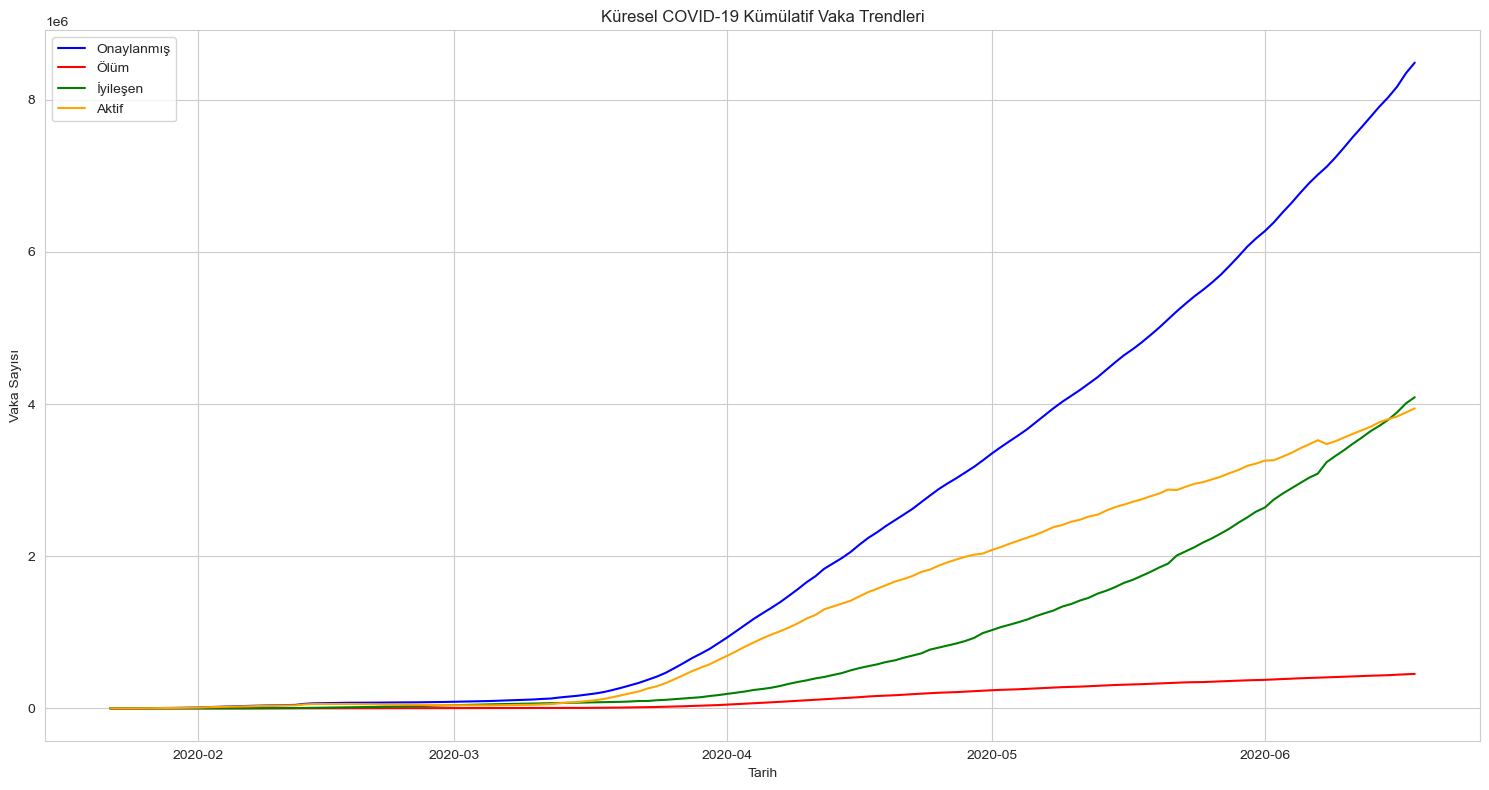

Grafik 1 tamamlandı.

2. Global Günlük Yeni Vaka Trendleri Grafiği Oluşturuluyor...


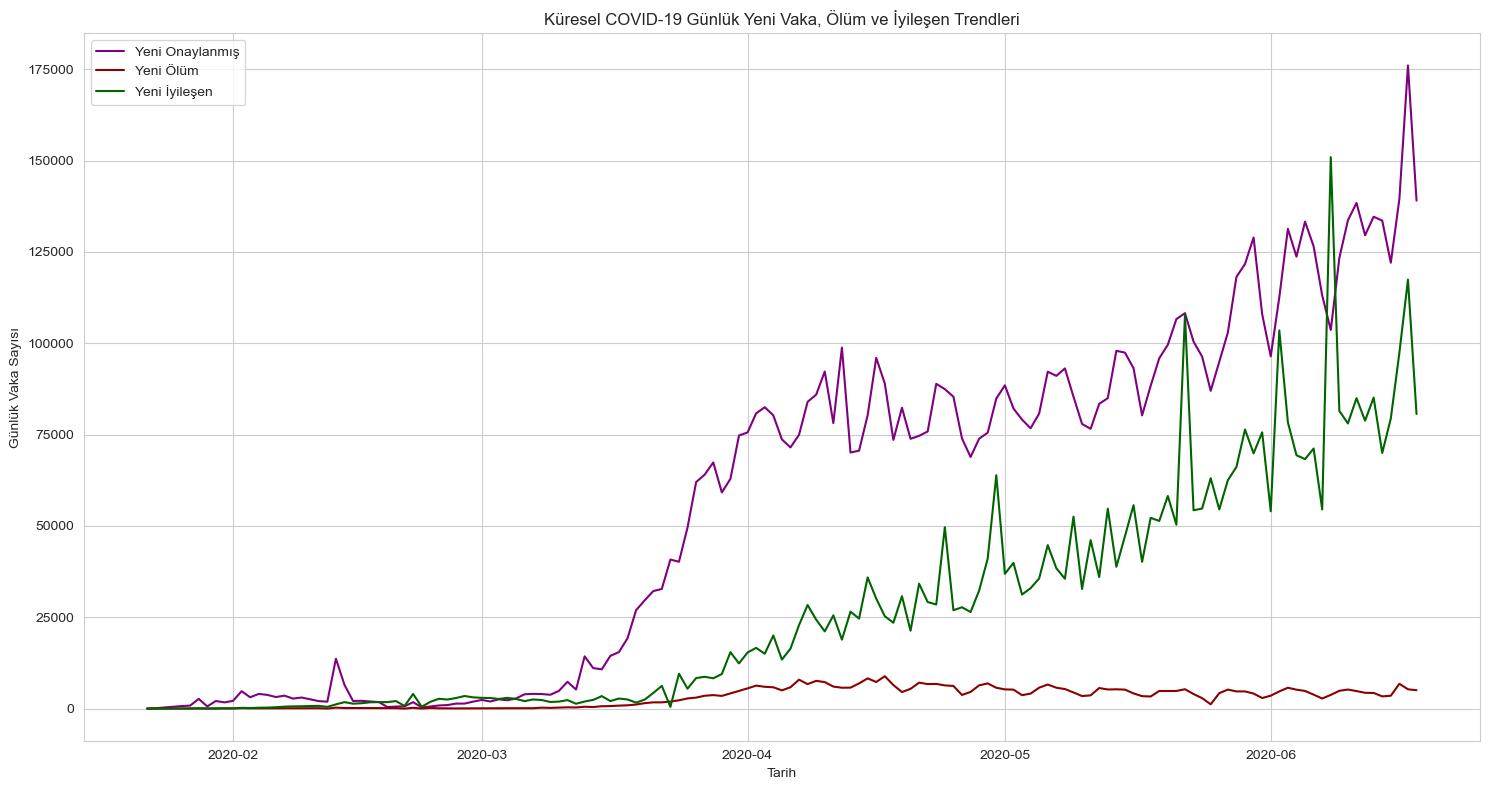

Grafik 2 tamamlandı.

3. Top 10 Ülke Vaka Dağılımı Grafiği Oluşturuluyor...


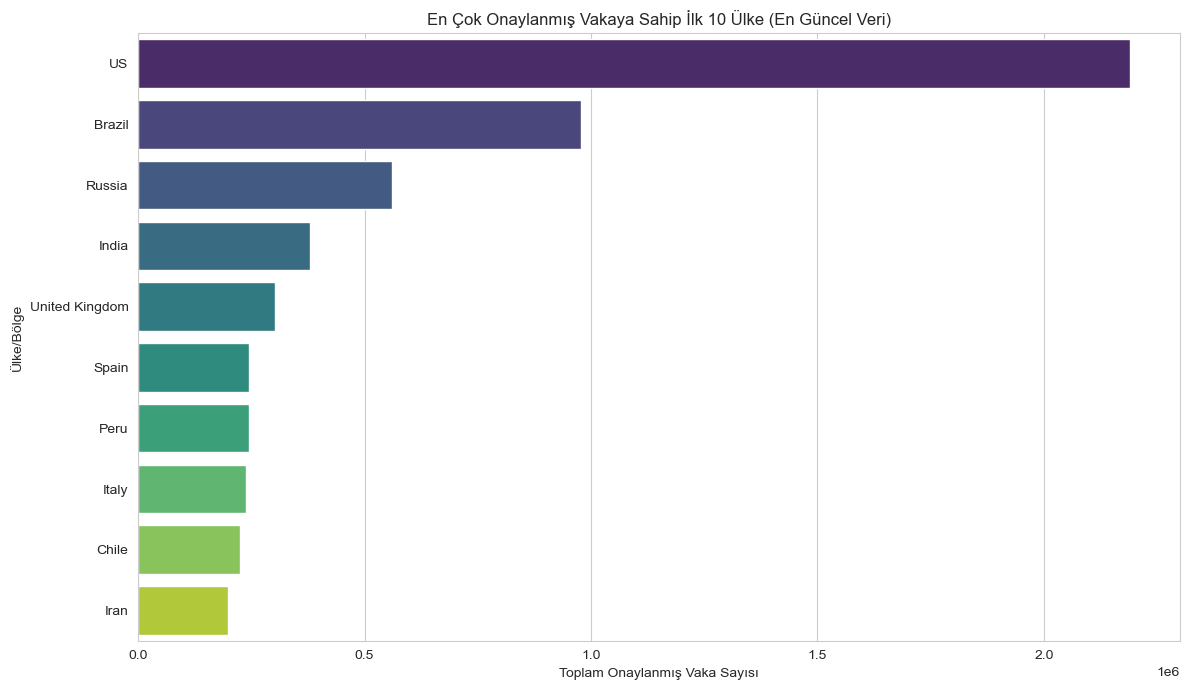

Grafik 3 tamamlandı.

4. WHO Bölgelerine Göre Vaka Dağılımı Grafiği Oluşturuluyor...


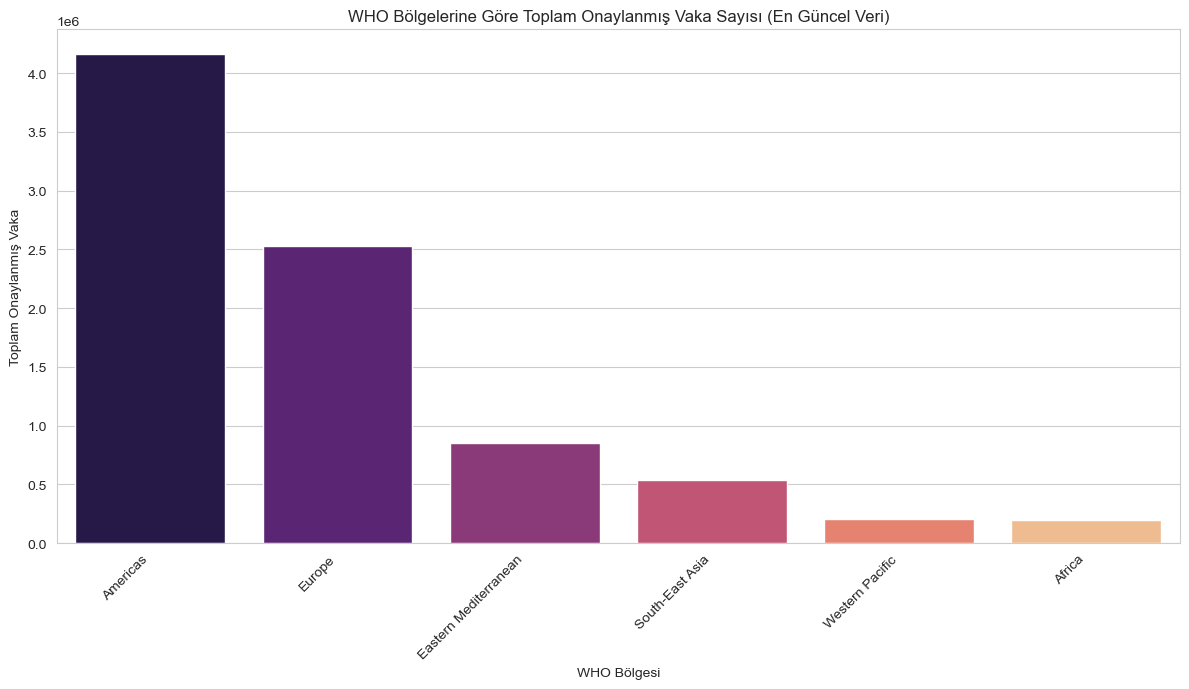

Grafik 4 tamamlandı.

--- Görselleştirme Adımları Tamamlandı ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin daha iyi görünmesi için stil ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Genel grafik boyutu

# Daha önceki DataFrame'lerinizin (df, global_daily_cases) yüklü olduğunu varsayıyorum.
# Eğer yeni bir oturuma başladıysanız, lütfen veri setinizi tekrar yükleyin ve 'Date' sütununu dönüştürün:
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"
try:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    # global_daily_cases DataFrame'ini de yeniden oluşturalım, eğer kaydedip tekrar yüklemiyorsak.
    global_daily_cases = df.groupby('Date').agg({
        'Confirmed': 'sum',
        'Deaths': 'sum',
        'Recovered': 'sum',
        'Active': 'sum'
    }).reset_index()
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    exit()

print("--- Görselleştirme Adımları Başlıyor ---\n")

# --- 1. Global Kümülatif Vaka Trendleri ---
print("1. Global Kümülatif Vaka Trendleri Grafiği Oluşturuluyor...")
plt.figure(figsize=(15, 8))
plt.plot(global_daily_cases['Date'], global_daily_cases['Confirmed'], label='Onaylanmış', color='blue')
plt.plot(global_daily_cases['Date'], global_daily_cases['Deaths'], label='Ölüm', color='red')
plt.plot(global_daily_cases['Date'], global_daily_cases['Recovered'], label='İyileşen', color='green')
plt.plot(global_daily_cases['Date'], global_daily_cases['Active'], label='Aktif', color='orange')
plt.title('Küresel COVID-19 Kümülatif Vaka Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Vaka Sayısı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Grafik dosyasını kaydetmek isterseniz:
# plt.savefig('global_cumulative_trends.png')
print("Grafik 1 tamamlandı.\n")

# --- 2. Global Günlük Yeni Vaka/Ölüm/İyileşen Trendleri ---
# Yeni vaka sayılarını hesaplamak için bir önceki günün değerinden çıkarma yapalım
# İlk önce tarih sütununu sıralamak önemli
global_daily_cases = global_daily_cases.sort_values(by='Date')

global_daily_cases['New_Confirmed'] = global_daily_cases['Confirmed'].diff().fillna(0).astype(int)
global_daily_cases['New_Deaths'] = global_daily_cases['Deaths'].diff().fillna(0).astype(int)
global_daily_cases['New_Recovered'] = global_daily_cases['Recovered'].diff().fillna(0).astype(int)

# İlk gün için NaN olan değerler 0 ile doldurulduğu için sorun olmaz.
# Negatif değerler oluşursa, veri toplama yönteminden kaynaklanabilir, ancak bu veri setinde nadir olmalı.

print("2. Global Günlük Yeni Vaka Trendleri Grafiği Oluşturuluyor...")
plt.figure(figsize=(15, 8))
plt.plot(global_daily_cases['Date'], global_daily_cases['New_Confirmed'], label='Yeni Onaylanmış', color='purple')
plt.plot(global_daily_cases['Date'], global_daily_cases['New_Deaths'], label='Yeni Ölüm', color='darkred')
plt.plot(global_daily_cases['Date'], global_daily_cases['New_Recovered'], label='Yeni İyileşen', color='darkgreen')
plt.title('Küresel COVID-19 Günlük Yeni Vaka, Ölüm ve İyileşen Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Günlük Vaka Sayısı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Grafik dosyasını kaydetmek isterseniz:
# plt.savefig('global_daily_new_trends.png')
print("Grafik 2 tamamlandı.\n")


# --- 3. Top 10 Ülke Vaka Dağılımı ---
# En çok etkilenen ilk 10 ülkeyi daha önce hesaplamıştık, şimdi görselleştirelim.
# latest_date_data DataFrame'ini kullanıyoruz.
latest_date_data = df[df['Date'] == df['Date'].max()]
top_10_countries = latest_date_data.groupby('Country/Region')['Confirmed'].sum().nlargest(10)

print("3. Top 10 Ülke Vaka Dağılımı Grafiği Oluşturuluyor...")
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('En Çok Onaylanmış Vakaya Sahip İlk 10 Ülke (En Güncel Veri)')
plt.xlabel('Toplam Onaylanmış Vaka Sayısı')
plt.ylabel('Ülke/Bölge')
plt.tight_layout()
plt.show()
# Grafik dosyasını kaydetmek isterseniz:
# plt.savefig('top_10_countries.png')
print("Grafik 3 tamamlandı.\n")

# --- 4. WHO Bölgelerine Göre Vaka Dağılımı ---
# WHO bölgelerine göre özet veriyi daha önce hesaplamıştık.
who_region_summary = latest_date_data.groupby('WHO Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).sort_values(by='Confirmed', ascending=False)

print("4. WHO Bölgelerine Göre Vaka Dağılımı Grafiği Oluşturuluyor...")
# Onaylanmış Vakalar için basit bir çubuk grafik
plt.figure(figsize=(12, 7))
sns.barplot(x=who_region_summary.index, y=who_region_summary['Confirmed'], palette='magma')
plt.title('WHO Bölgelerine Göre Toplam Onaylanmış Vaka Sayısı (En Güncel Veri)')
plt.xlabel('WHO Bölgesi')
plt.ylabel('Toplam Onaylanmış Vaka')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# İsterseniz Deaths ve Recovered için de benzer grafikler çizebiliriz,
# ya da tümünü tek bir yığılmış çubuk grafikte gösterebiliriz.
# Şimdilik Confirmed ile devam edelim, diğerlerini isteğe bağlı olarak ekleyebiliriz.

# Yığılmış çubuk grafik örneği (tüm metrikleri tek grafikte göstermek için)
# who_region_summary[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(
#     kind='bar', stacked=True, figsize=(12, 7), colormap='viridis'
# )
# plt.title('WHO Bölgelerine Göre Vaka Dağılımı (Onaylanmış, Ölüm, İyileşen, Aktif)')
# plt.xlabel('WHO Bölgesi')
# plt.ylabel('Vaka Sayısı')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()
# plt.savefig('who_region_stacked_cases.png')

print("Grafik 4 tamamlandı.\n")
print("--- Görselleştirme Adımları Tamamlandı ---")

5. Korelasyon Analizi ve Isı Haritası
Bu kod bloğu, veri setindeki sayısal değişkenler arasındaki doğrusal ilişkileri (korelasyonları) hesaplar ve bu ilişkileri bir ısı haritası (heatmap) üzerinde görselleştirir. Korelasyon analizi, değişkenlerin birbirini ne ölçüde ve ne yönde (pozitif veya negatif) etkilediğini anlamak için güçlü bir yöntemdir.

Amacı ve Önemi:
Veri Yükleme ve Hazırlık Kontrolü: Önceki bloklarda olduğu gibi, DataFrame'in doğru yüklendiğinden ve Date sütununun datetime formatında olduğundan emin olmak için başlangıçta gerekli yükleme ve dönüşüm adımları tekrarlanır.

Sayısal Sütunların Seçimi: Korelasyon analizi sadece sayısal değerler arasında yapılabildiği için, Lat, Long, Confirmed, Deaths, Recovered, Active gibi ilgili sayısal sütunlar seçilir.

Korelasyon Matrisinin Hesaplanması (.corr()):

Amaç: Seçilen sayısal sütunlar arasındaki Pearson korelasyon katsayılarını içeren bir matris oluşturmaktır. Korelasyon katsayısı -1 ile +1 arasında değişir:

+1: Mükemmel pozitif doğrusal ilişki (bir değişken arttığında diğeri de artar).

-1: Mükemmel negatif doğrusal ilişki (bir değişken arttığında diğeri azalır).

0: Doğrusal ilişki yok.

Önem: Hangi değişkenlerin birlikte hareket ettiğini veya birbirini etkilediğini gösterir. Örneğin, "Onaylanmış" vaka sayısıyla "Ölüm" sayısının ne kadar güçlü ilişkili olduğunu anlamamızı sağlar. Yüksek korelasyon, bir değişkenin diğerini tahmin etmede ne kadar yardımcı olabileceğine dair bir ipucu verebilir.

Korelasyon Matrisinin Isı Haritası ile Görselleştirilmesi (sns.heatmap()):

Amaç: Hesaplanan korelasyon matrisini renk kodlamasıyla görselleştirmektir. Renk tonları, korelasyon katsayısının büyüklüğünü ve yönünü (pozitif/negatif) temsil eder. annot=True ile her kutucuğa korelasyon değeri yazdırılır, cmap='coolwarm' renk paleti pozitif ve negatif ilişkileri ayırt etmeyi kolaylaştırır.

Önem: Korelasyon matrisinin ham sayısal çıktısı yerine, renkli bir ısı haritası, değişkenler arasındaki ilişkileri bir bakışta hızlı ve sezgisel bir şekilde anlamamızı sağlar. Özellikle birden fazla değişken olduğunda, güçlü ilişkileri (parlak kırmızı/mavi), zayıf ilişkileri (soluk renkler) ve bağımsız görünen değişkenleri kolayca ayırt etmeye yardımcı olur. Bu, özellik seçimi ve çoklu doğrusallık gibi konular için önemli bir ön adımdır.

Bu adım, veri setindeki değişkenler arasındaki içsel ilişkileri derinlemesine anlayarak, hangi özelliklerin modelleme için daha uygun veya hangi değişkenlerin birbirine bağımlı olduğunu görmemizi sağlar.

--- Korelasyon Analizi Başlıyor ---

--- Korelasyon Matrisi ---

                Lat      Long  Confirmed    Deaths  Recovered    Active
Lat        1.000000 -0.128016   0.059671  0.078320   0.054908  0.054583
Long      -0.128016  1.000000  -0.073911 -0.083855  -0.044931 -0.079442
Confirmed  0.059671 -0.073911   1.000000  0.930746   0.868777  0.974020
Deaths     0.078320 -0.083855   0.930746  1.000000   0.789480  0.902862
Recovered  0.054908 -0.044931   0.868777  0.789480   1.000000  0.735331
Active     0.054583 -0.079442   0.974020  0.902862   0.735331  1.000000


Korelasyon Matrisi Isı Haritası Oluşturuluyor...


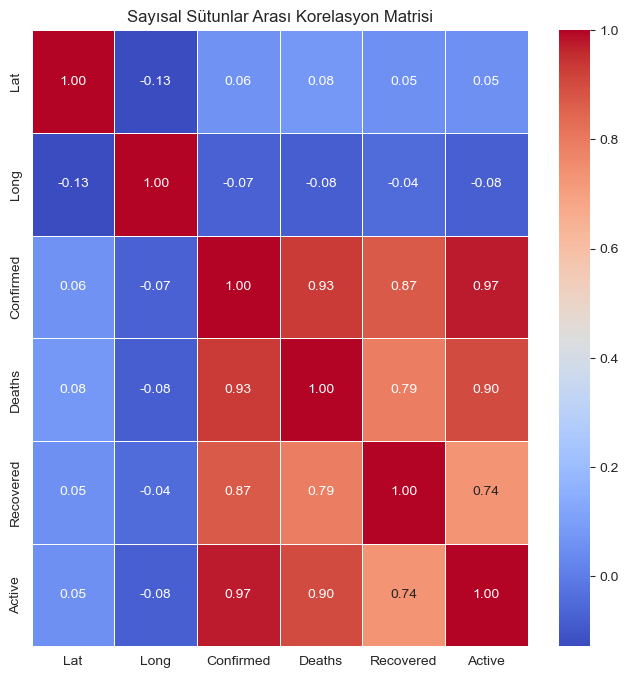

Isı haritası tamamlandı.

--- Korelasyon Analizi Tamamlandı ---


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daha önceki DataFrame'inizin 'df' olarak yüklü olduğunu varsayıyorum.
# Eğer yeni bir oturuma başladıysanız, lütfen veri setinizi tekrar yükleyin:
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"
try:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date']) # Tarih sütununu tekrar dönüştürelim
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    exit()

print("--- Korelasyon Analizi Başlıyor ---\n")

# Sadece sayısal sütunları seçelim
numerical_cols = ['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']
correlation_matrix = df[numerical_cols].corr()

print("--- Korelasyon Matrisi ---\n")
print(correlation_matrix)
print("\n" + "="*50 + "\n")

# Korelasyon Matrisini Isı Haritası ile Görselleştirme
print("Korelasyon Matrisi Isı Haritası Oluşturuluyor...")
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Sayısal Sütunlar Arası Korelasyon Matrisi')
plt.show()
# Grafik dosyasını kaydetmek isterseniz:
# plt.savefig('correlation_heatmap.png')
print("Isı haritası tamamlandı.\n")

print("--- Korelasyon Analizi Tamamlandı ---")

6. Özellik Seçimi İçin Veri Hazırlığı - En Güncel Veri Anlık Görüntüsü
Bu kod bloğu, veri madenciliği projemizin temel amacı olan "vaka sayılarını etkileyen en önemli faktörleri belirleme" hedefine yönelik ilk hazırlık adımlarını içerir. Özellikle, analiz için uygun bir veri anlık görüntüsü oluşturmaya odaklanır.

Amacı ve Önemi:
Veri Yükleme ve Tarih Dönüşümü: Önceki adımlarda olduğu gibi, veri setinin doğru bir şekilde yüklendiğinden ve Date sütununun datetime formatında olduğundan emin olmak için gerekli başlangıç işlemleri yapılır. Bu, sonraki tarih tabanlı filtrelemelerin sorunsuz çalışmasını sağlar.

En Güncel Veri Anlık Görüntüsünü Alma (latest_date_data):

Amaç: Zaman serisi niteliğindeki COVID-19 verileri için, genellikle en güncel durumu yansıtan verilerle çalışmak istenir. Bu kod, df['Date'].max() komutu ile veri setindeki en son tarihi bulur ve df[df['Date'] == df['Date'].max()] ifadesiyle sadece o tarihe ait tüm gözlemleri içeren yeni bir DataFrame (latest_date_data) oluşturur.

Önem: Bu anlık görüntü, her ülke/bölge için pandeminin ulaştığı son durumu temsil eder. "Vaka sayılarını etkileyen faktörleri belirlemek" gibi bir amaç için, genellikle toplam (kümülatif) vaka sayıları üzerinden analiz yapılır ve en güncel toplamlar, o ana kadarki kümülatif etkiyi en iyi yansıtır. Bu yaklaşım, zaman içindeki günlük dalgalanmalar yerine, genel etkiyi etkileyen temel faktörlere odaklanmamızı sağlar.

Bağımlı ve Bağımsız Değişkenlerin Ön Belirlemesi:

Kod içerisindeki yorumlar, Confirmed (Onaylanmış) vaka sayısının bağımlı değişken (hedef) olarak ele alındığını açıklar.

Active, Deaths, Recovered gibi diğer vaka metriklerinin Confirmed ile zaten matematiksel olarak ilişkili olduğu (ve yüksek korelasyon gösterdiği) belirtilir. Bu nedenle, Confirmed'ı etkileyen "çevresel/coğrafi" faktörlere odaklanmak amacıyla, bağımsız değişkenler olarak Country/Region, WHO Region, Lat ve Long gibi özellikler öne sürülür.

Önem: Bu ön belirleme, analizimizin kapsamını netleştirir ve modelin sadece matematiksel ilişkileri yeniden üretmek yerine, Confirmed vaka sayılarını gerçekten açıklayan harici faktörleri öğrenmesine odaklanmasını sağlar.

Bu hazırlık adımı, özellik seçimi ve önem analizi için sağlam bir temel oluşturur, çünkü analizin doğru ve anlamlı bir veri alt kümesi üzerinde yapılmasını sağlar.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme ve 'Date' sütununu dönüştürme (gerekliyse)
file_path = "C:\\Users\\EXCALIBUR\\Desktop\\covid_19_clean_complete.csv"
try:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
except FileNotFoundError:
    print(f"Hata: Belirtilen yolda dosya bulunamadı: {file_path}")
    exit()

# Her ülke/bölge için en güncel veriyi alarak DataFrame'i hazırlama
# Bu, zaman içindeki toplam etkiyi incelememizi sağlar.
latest_date_data = df[df['Date'] == df['Date'].max()]

# Özellik seçimi için sadece ilgili sütunları alalım
# Bağımlı değişkenimiz 'Confirmed' olacak.
# Bağımsız değişkenler: 'Country/Region', 'WHO Region', 'Lat', 'Long', 'Active', 'Deaths', 'Recovered'
# NOT: 'Active', 'Deaths', 'Recovered' zaten 'Confirmed' ile matematiksel olarak ilişkili olduğu için
# doğrudan tahminleyici olarak kullanmak yanıltıcı olabilir. Bu yüzden bu ilk adımda,
# coğrafi ve kategorik özellikleri incelemeye odaklanalım.

# Coğrafi ve Kategorik Özelliklerin 'Confirmed' üzerindeki etkisine bakacağız.
# 'Active', 'Deaths', 'Recovered' gibi değerler 'Confirmed' ile yüksek korelasyon gösterdiğinden,
# bunları direkt bağımsız değişken olarak almak, 'faktor belirleme' yerine 'hesaplama' gibi olur.
# Biz 'Confirmed' sayısını etkileyen diğer çevresel/coğrafi faktörlere odaklanalım.
# Bu durumda modelde bağımsız değişken olarak şunları kullanabiliriz:
# 'Country/Region', 'WHO Region', 'Lat', 'Long'
# Date sütunu ise anlık görüntü alındığı için sabit kalacaktır.

print("--- Özellik Seçimi İçin Veri Hazırlığı ---\n")
print("En güncel tarih: ", df['Date'].max())
print("Hazırlanan veri setinin ilk 5 satırı (en güncel tarih için):\n")
print(latest_date_data.head())
print("\n" + "="*50 + "\n")

--- Özellik Seçimi İçin Veri Hazırlığı ---

En güncel tarih:  2020-06-18 00:00:00
Hazırlanan veri setinin ilk 5 satırı (en güncel tarih için):

      Province/State Country/Region      Lat     Long       Date  Confirmed  \
38628            NaN    Afghanistan  33.0000  65.0000 2020-06-18      27532   
38629            NaN        Albania  41.1533  20.1683 2020-06-18       1788   
38630            NaN        Algeria  28.0339   1.6596 2020-06-18      11385   
38631            NaN        Andorra  42.5063   1.5218 2020-06-18        855   
38632            NaN         Angola -11.2027  17.8739 2020-06-18        166   

       Deaths  Recovered  Active             WHO Region  
38628     546       7660   19326  Eastern Mediterranean  
38629      39       1086     663                 Europe  
38630     811       8078    2496                 Africa  
38631      52        792      11                 Europe  
38632       8         64      94                 Africa  




7. Kategorik Değişkenlerin Kodlanması (One-Hot Encoding)
Bu kod bloğu, veri setindeki kategorik (metinsel) değişkenleri, makine öğrenimi modellerinin doğrudan işleyebileceği sayısal bir formata dönüştürme işlemini gerçekleştirir. Bu dönüşüm için yaygın olarak kullanılan One-Hot Encoding yöntemi kullanılır.

Amacı ve Önemi:
Model Uyumluluğu: Makine öğrenimi algoritmalarının çoğu, metinsel veya kategorik verileri doğrudan anlayamaz. Bu değişkenlerin sayısal temsilere dönüştürülmesi, modellerin bu bilgiyi kullanabilmesi için bir önkoşuldur.

One-Hot Encoding Yöntemi:

Nasıl Çalışır: Bir kategorik sütundaki her benzersiz değer için yeni bir ikili (binary) sütun oluşturur. Orijinal sütundaki bir gözlem belirli bir kategoriye aitse, o kategoriye karşılık gelen yeni sütunda 1 değeri, diğer yeni sütunlarda ise 0 değeri atanır.

pd.get_dummies(): Pandas kütüphanesinin bu fonksiyonu, One-Hot Encoding işlemini kolayca yapmamızı sağlar.

drop_first=True: Bu parametre, her kategorik değişken grubu için bir kategorinin düşürülmesini (atılmasını) sağlar. Örneğin, 5 farklı WHO Bölgesi varsa, 4 yeni sütun oluşturulur. Bu, "çoklu doğrusallık" (multicollinearity) sorununu önlemeye yardımcı olur; bu sorun, bir özellik kümesindeki bir değişkenin diğerlerinden mükemmel veya yüksek derecede tahmin edilebilir olması durumunda ortaya çıkar ve regresyon modellerinde sorunlara yol açabilir.

İlgili Sütunların Seçimi: Kod, One-Hot Encoding'i sadece Country/Region ve WHO Region sütunlarına uygular, çünkü bunlar bağımsız değişkenler olarak kullanılacak kategorik bilgiler içerir. Lat, Long ve Confirmed zaten sayısal olduğu için doğrudan alınır.

Veri Seti Boyutunun Değişimi: One-Hot Encoding sonrası DataFrame'in boyutları (features_df.shape) yeniden yazdırılır. Bu, işlem sonucunda eklenen yeni sütunların sayısını görmemizi sağlar. Genellikle, çok sayıda benzersiz kategoriye sahip sütunlar (ülke isimleri gibi), sütun sayısında önemli bir artışa neden olur.

Bu dönüşüm, kategorik bilgilerin model tarafından etkili bir şekilde kullanılmasını sağlayarak, özellik seçimi ve model performansının artırılmasına olanak tanır.

In [35]:
# Adım 2: Kategorik Değişkenleri Kodlama (One-Hot Encoding)
# 'Country/Region' ve 'WHO Region' sütunlarını One-Hot Encoding ile dönüştürelim.

print("--- Kategorik Değişkenlerin Kodlanması (One-Hot Encoding) ---\n")

# One-Hot Encoding uygulamadan önce, sadece ihtiyacımız olan sütunları seçelim.
# Bağımsız değişkenler: 'Country/Region', 'WHO Region', 'Lat', 'Long'
# Bağımlı değişken: 'Confirmed'
features_df = latest_date_data[['Country/Region', 'WHO Region', 'Lat', 'Long', 'Confirmed']].copy()

# 'Country/Region' ve 'WHO Region' sütunlarına One-Hot Encoding uygulayalım
features_df = pd.get_dummies(features_df, columns=['Country/Region', 'WHO Region'], drop_first=True) # drop_first ile çoklu doğrusallığı önleriz

print("One-Hot Encoding sonrası veri setinin ilk 5 satırı:\n")
print(features_df.head())
print("\n" + "="*50 + "\n")

print("One-Hot Encoding sonrası veri setinin boyutları: ", features_df.shape)
print("\n" + "="*50 + "\n")

--- Kategorik Değişkenlerin Kodlanması (One-Hot Encoding) ---

One-Hot Encoding sonrası veri setinin ilk 5 satırı:

           Lat     Long  Confirmed  Country/Region_Albania  \
38628  33.0000  65.0000      27532                       0   
38629  41.1533  20.1683       1788                       1   
38630  28.0339   1.6596      11385                       0   
38631  42.5063   1.5218        855                       0   
38632 -11.2027  17.8739        166                       0   

       Country/Region_Algeria  Country/Region_Andorra  Country/Region_Angola  \
38628                       0                       0                      0   
38629                       0                       0                      0   
38630                       1                       0                      0   
38631                       0                       1                      0   
38632                       0                       0                      1   

       Country/Region_Antigua 

8. Özellik Önem Analizi (Random Forest Regressor ile)
Bu kod bloğu, veri madenciliği projemizin temel hedefi olan "vaka sayılarını etkileyen en önemli faktörleri belirleme" amacına ulaşmak için Model Tabanlı Özellik Önem Analizini uygular. Bu analiz için Random Forest Regressor makine öğrenimi modeli kullanılır.

Amacı ve Önemi:
Kütüphane İçe Aktarma: sklearn.ensemble.RandomForestRegressor (Random Forest modelini sağlar) ve sklearn.model_selection.train_test_split (veri setini eğitim ve test kümelerine ayırmak için) kütüphaneleri içeri aktarılır. numpy ise sayısal işlemler için genel bir kütüphanedir.

Hedef ve Özellik Değişkenlerinin Belirlenmesi:

X (Özellikler/Bağımsız Değişkenler): features_df DataFrame'inden bağımlı değişken olan 'Confirmed' sütunu çıkarılarak, geriye kalan tüm sütunlar (kodlanmış ülkeler/bölgeler, Lat, Long) özellik olarak atanır.

y (Hedef/Bağımlı Değişken): Tahmin etmeye çalıştığımız Confirmed (Onaylanmış) vaka sayısı hedef değişken olarak belirlenir.

Eğitim ve Test Setlerine Ayırma (train_test_split):

Amaç: Modelin genellenebilirliğini değerlendirmek ve aşırı uyumu (overfitting) önlemek amacıyla veri seti tipik olarak eğitim ve test kümelerine ayrılır. Eğitim seti modeli eğitmek için, test seti ise eğitilmiş modelin yeni, görülmemiş verilerdeki performansını değerlendirmek için kullanılır.

Önem: Bu özel durumda (sadece özellik önemine odaklandığımız için) modelin tahminsel doğruluğunu doğrudan değerlendirmek yerine, her bir özelliğin modelin hedef değişkeni öğrenmesindeki katkısını istikrarlı bir şekilde belirlemesine yardımcı olur. random_state parametresi, bölme işleminin her çalıştırmada aynı olmasını sağlayarak tekrarlanabilirliği garantiler.

Random Forest Regressor Modelinin Eğitimi:

Amaç: RandomForestRegressor modeli oluşturulur ve X_train özellikleri ile y_train hedefleri kullanılarak eğitilir (.fit() metodu). n_estimators=100 parametresi, modelin 100 karar ağacından oluşacağını belirtir; bu, daha güçlü ve istikrarlı bir tahmin performansı sağlar.

Önem: Random Forest, birçok karar ağacının bir araya gelmesiyle oluşan güçlü bir topluluk öğrenme (ensemble learning) modelidir. Doğrusal olmayan ilişkileri yakalama ve yüksek boyutlu verilerle başa çıkma yeteneği sayesinde özellik önemini belirlemede oldukça etkilidir.

Özellik Önemlerinin Elde Edilmesi (model.feature_importances_):

Amaç: Eğitilmiş Random Forest modelinin, her bir özelliğin hedef değişkenin varyansını açıklamaya ne kadar katkıda bulunduğunu belirleyen dahili bir mekanizması vardır. Bu değerler feature_importances_ özniteliği aracılığıyla erişilir.

Önem: Bu değerler, her bir özelliğin modelin tahmin yeteneği üzerindeki göreceli etkisini doğrudan nicel olarak gösterir. Yüksek önem değeri, o özelliğin Confirmed vaka sayılarını etkilemede daha kritik olduğunu gösterir.

Özellik Önemlerinin Sıralanması ve Görüntülenmesi:

Özellik isimleri ve önem değerleri bir DataFrame'de birleştirilir ve önem değerlerine göre azalan sırada sıralanır. İlk 15 en önemli özellik yazdırılır.

Önem: Bu sıralı liste, vaka sayılarını etkileyen en belirleyici faktörleri açıkça görmemizi sağlar ve analizimizin sonucunu oluşturur.

Özellik Önemlerinin Görselleştirilmesi (Çubuk Grafik):

Amaç: En önemli özelliklerin önem değerlerini görsel olarak karşılaştırmak için bir çubuk grafik oluşturulur.

Önem: Grafikler, sayısal değerlerin yorumlanmasını kolaylaştırır. Hangi özelliklerin diğerlerinden çok daha önemli olduğunu veya önem değerleri arasındaki farkları bir bakışta algılamamızı sağlar.

Bu kod bloğu, veri madenciliği projenizin ana hedefine ulaşmak için güçlü bir analitik araç kullanarak, vaka sayılarını etkileyen gizli faktörleri ortaya çıkarmanızı sağlar. Elde edilen önem değerleri, pandeminin yayılımını yönlendiren temel unsurlar hakkında somut içgörüler sunar.

--- Özellik Önem Analizi (Random Forest Regressor ile) ---

Özellik Önemleri (Azalan Sırada):

                       Feature  Importance
174          Country/Region_US    0.588288
24       Country/Region_Brazil    0.154173
139      Country/Region_Russia    0.079971
80        Country/Region_India    0.036733
158       Country/Region_Spain    0.019972
86        Country/Region_Italy    0.019037
133        Country/Region_Peru    0.019032
36        Country/Region_Chile    0.015031
66      Country/Region_Germany    0.012137
82         Country/Region_Iran    0.010903
173      Country/Region_Turkey    0.010857
112      Country/Region_Mexico    0.007820
129    Country/Region_Pakistan    0.007059
14   Country/Region_Bangladesh    0.002802
0                          Lat    0.002548


Özellik Önemleri Grafiği Oluşturuluyor...


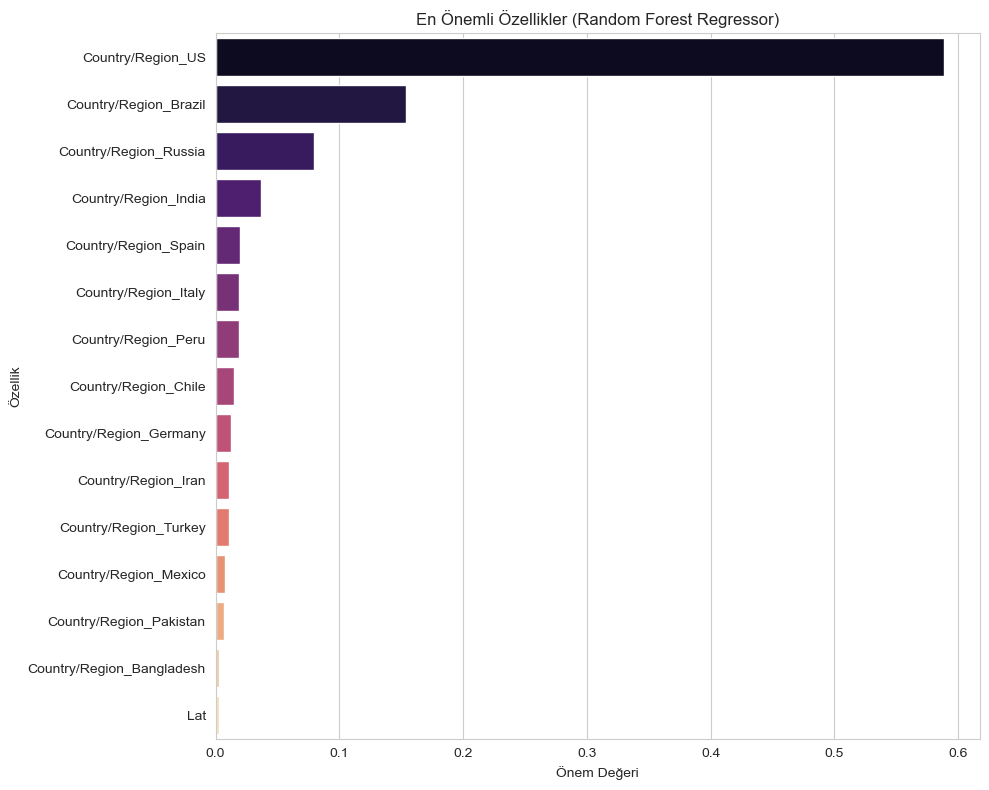

Grafik tamamlandı.

--- Özellik Önem Analizi Tamamlandı ---


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

print("--- Özellik Önem Analizi (Random Forest Regressor ile) ---\n")

# Hedef değişken (target) ve özellikler (features) belirleme
X = features_df.drop('Confirmed', axis=1) # 'Confirmed' bağımlı değişkenimiz
y = features_df['Confirmed']             # 'Confirmed' hedefimiz

# Modelin daha genellenebilir olması için veriyi eğitim ve test setlerine ayırma (isteğe bağlı ama iyi pratik)
# Ancak burada sadece özellik önemine baktığımız için eğitim/test ayırımı modelin doğruluğu için değil,
# modelin özellik önemini öğrenmesi için yapılıyor.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor modelini oluşturma ve eğitme
# n_estimators: Ağaç sayısı
# random_state: Tekrarlanabilirlik için
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Özellik önemlerini alma
feature_importances = model.feature_importances_

# Özellik isimlerini ve önem değerlerini bir DataFrame'de birleştirme
features_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Önem değerlerine göre azalan sırada sıralama
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

print("Özellik Önemleri (Azalan Sırada):\n")
print(features_importance_df.head(15)) # İlk 15 önemli özelliği gösterelim
print("\n" + "="*50 + "\n")

# Özellik önemlerini görselleştirme
print("Özellik Önemleri Grafiği Oluşturuluyor...")
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_importance_df.head(15), palette='magma')
plt.title('En Önemli Özellikler (Random Forest Regressor)')
plt.xlabel('Önem Değeri')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()
# plt.savefig('feature_importance.png')
print("Grafik tamamlandı.\n")

print("--- Özellik Önem Analizi Tamamlandı ---")